In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,mean_squared_error, mean_absolute_error

Simply view the data

In [2]:
file = 'AirQualityUCI _ Students.xlsx'
data = pd.read_excel(file)
df=pd.DataFrame(data)
df


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8353,2005-04-01,10:00:00,1.0,947.75,-200,3.525377,683.75,180.0,851.00,119.9,1010.50,599.00,16.450,40.775000,0.757020
8354,2005-04-01,11:00:00,1.0,938.50,-200,3.576895,686.75,197.1,869.75,122.9,980.50,549.50,18.925,33.775001,0.731210
8355,2005-04-01,12:00:00,1.1,924.50,-200,4.045717,713.25,172.0,853.00,114.9,956.75,518.00,19.175,29.475000,0.648005
8356,2005-04-01,13:00:00,1.3,923.75,-200,4.519882,738.75,183.6,833.75,122.2,966.00,540.50,19.925,26.300000,0.605405


Plot the features with time

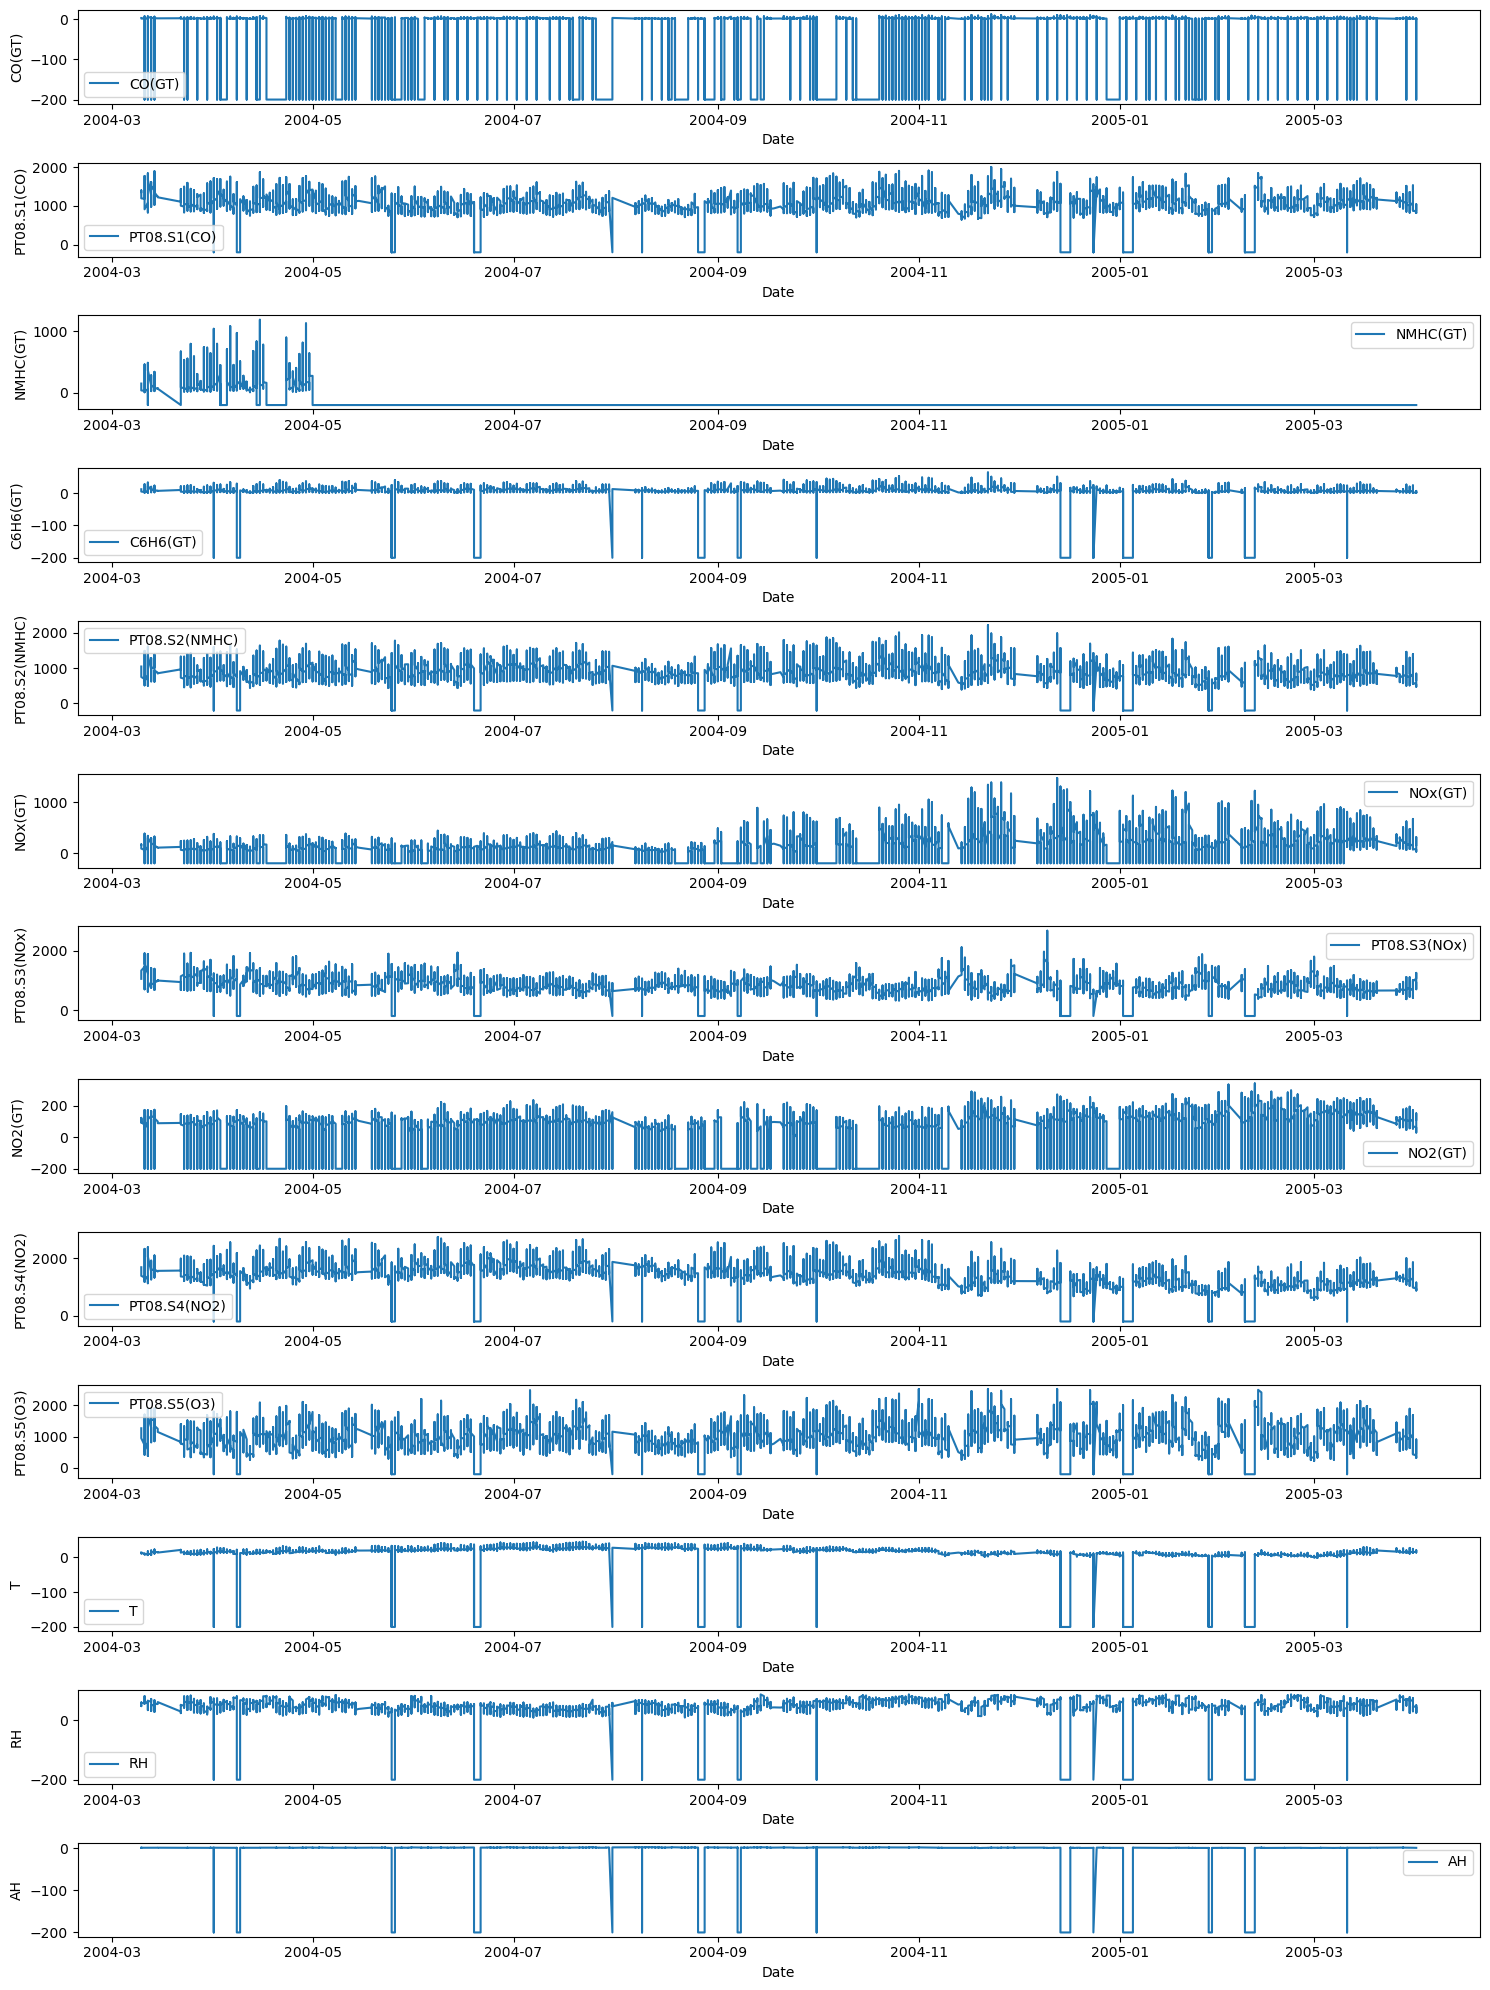

In [3]:

features = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 
                    'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 
                    'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']

plt.figure(figsize=(15, 20))
for i, feature in enumerate(features):
    plt.subplot(len(features), 1, i+1)
    plt.plot(df['Date'], df[feature], label=feature)
    plt.xlabel('Date')
    plt.ylabel(feature)
    plt.legend()
plt.tight_layout()
plt.show()

Simply view of missing value

In [4]:
df = df.replace(-200, np.nan)
missing_values = df.isnull().sum()
missing_values = missing_values[2:]

missing_values_df = pd.DataFrame(missing_values, columns=['Missing Values'])
missing_values_df.reset_index(inplace=True)
missing_values_df.columns = ['Feature', 'Missing Values']

print(missing_values_df)

          Feature  Missing Values
0          CO(GT)            1585
1     PT08.S1(CO)             366
2        NMHC(GT)            7525
3        C6H6(GT)             366
4   PT08.S2(NMHC)             366
5         NOx(GT)            1573
6    PT08.S3(NOx)             366
7         NO2(GT)            1576
8    PT08.S4(NO2)             366
9     PT08.S5(O3)             366
10              T             366
11             RH             366
12             AH             366


Deal with missing value

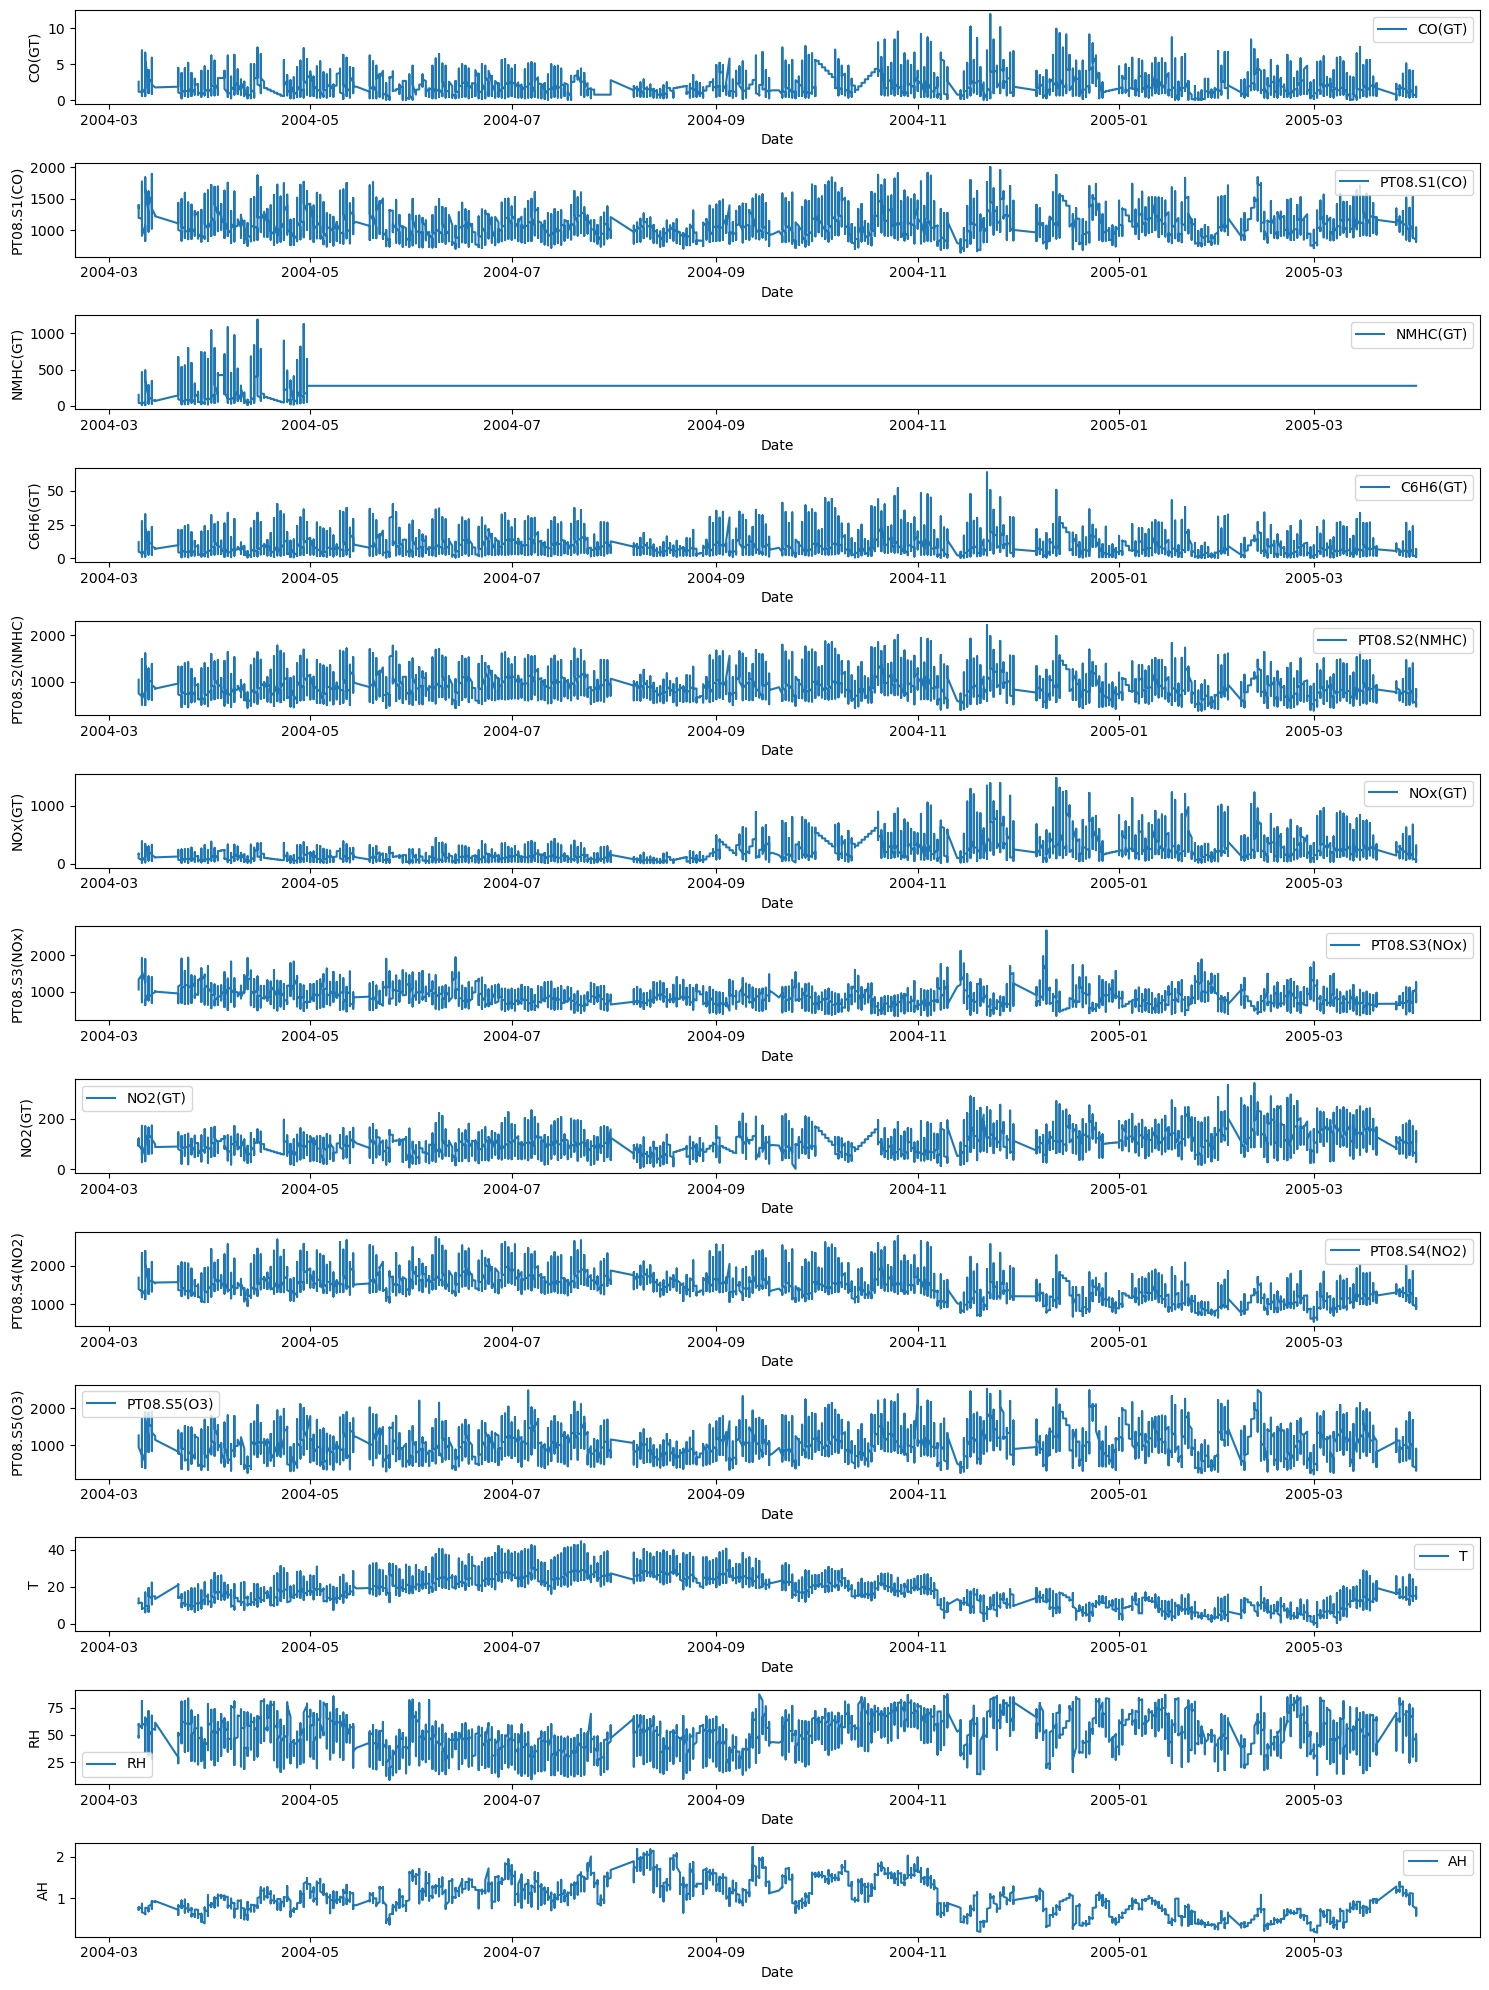

In [5]:
df_features = df.drop(columns=['Date', 'Time'])
#interpolation
df_features.interpolate(method='linear', inplace=True)

#check again
plt.figure(figsize=(15, 20))
for i, feature in enumerate(features):
    plt.subplot(len(features), 1, i+1)
    plt.plot(df['Date'], df_features[feature], label=feature)
    plt.xlabel('Date')
    plt.ylabel(feature)
    plt.legend()
plt.tight_layout()
plt.show()

Correlation analysis

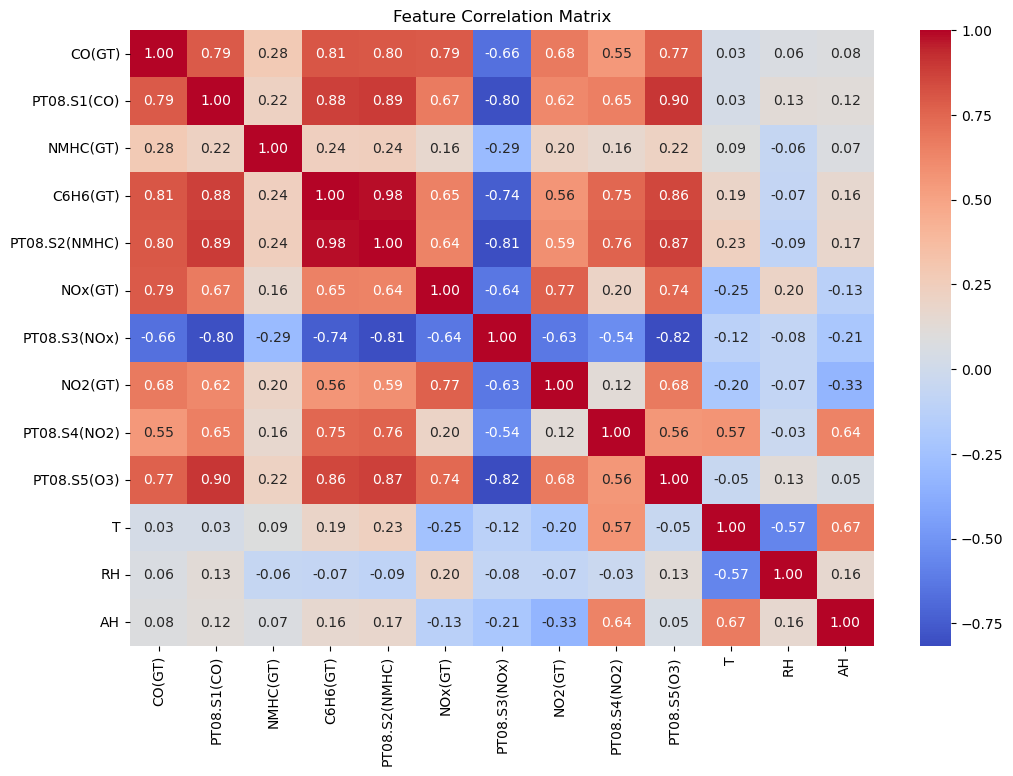

In [6]:
#plot correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()


Task1: classification CO(GT)

In [7]:
#print correlation of CO(GT)
print(correlation_matrix['CO(GT)'])

CO(GT)           1.000000
PT08.S1(CO)      0.787534
NMHC(GT)         0.278245
C6H6(GT)         0.805360
PT08.S2(NMHC)    0.797849
NOx(GT)          0.790964
PT08.S3(NOx)    -0.661843
NO2(GT)          0.676897
PT08.S4(NO2)     0.549288
PT08.S5(O3)      0.767356
T                0.028405
RH               0.063523
AH               0.079203
Name: CO(GT), dtype: float64


1. Highly Correlated Features

Based on the correlation matrix, the following features are highly correlated with CO(GT):

	•	PT08.S1(CO): Correlation = 0.79
	•	C6H6(GT): Correlation = 0.81
	•	PT08.S2(NMHC): Correlation = 0.80
	•	NOx(GT): Correlation = 0.79
	•	NO2(GT): Correlation = 0.68
	•	PT08.S4(NO2): Correlation = 0.55
	•	PT08.S5(O3): Correlation = 0.77

2. Data Integrity

Due to the high number of missing values in NMHC(GT), I decided to remove this feature.

3. Avoiding Redundancy

The following features are selected for their high correlation with CO(GT) and relatively lower correlation with each other:

	•	PT08.S1(CO): Correlation = 0.79
	•	C6H6(GT): Correlation = 0.81
	•	NOx(GT): Correlation = 0.79
	•	NO2(GT): Correlation = 0.68
	•	PT08.S5(O3): Correlation = 0.77

Feature selection

In [8]:
# eature_selection
features1 = df_features[['PT08.S1(CO)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)', 'PT08.S5(O3)']]
target_classification = df_features['CO(GT)'] > df_features['CO(GT)'].mean()


In [9]:
#scale data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features1)

#spilit dataset
X_train, X_test, y_train_classification, y_test_classification = train_test_split(features_scaled, target_classification, test_size=0.2, random_state=42)

Build model and train it

In [10]:
#design network
def create_classification_model(input_shape):
    model = Sequential()
    model.add(Dense(64, input_dim=input_shape, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.6))
    model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.6))
    model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(1, activation='sigmoid'))
    return model

input_shape = X_train.shape[1]

#build
classification_model = create_classification_model(input_shape)

#compile
classification_model.compile(optimizer=Adam(learning_rate=0.0005),loss='binary_crossentropy',metrics=['accuracy'])

#train
history = classification_model.fit(X_train, y_train_classification,epochs=150,batch_size=32,validation_split=0.2)

#save
classification_model.save('classification_model.h5')

Epoch 1/150


2024-06-23 17:49:15.517419: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


168/168 [==============================] - 0s 915us/step - loss: 1.1935 - accuracy: 0.6832 - val_loss: 0.8884 - val_accuracy: 0.8617
Epoch 2/150
168/168 [==============================] - 0s 488us/step - loss: 0.8434 - accuracy: 0.8345 - val_loss: 0.6946 - val_accuracy: 0.8610
Epoch 3/150
168/168 [==============================] - 0s 468us/step - loss: 0.6724 - accuracy: 0.8575 - val_loss: 0.5819 - val_accuracy: 0.8700
Epoch 4/150
168/168 [==============================] - 0s 524us/step - loss: 0.5740 - accuracy: 0.8633 - val_loss: 0.5111 - val_accuracy: 0.8707
Epoch 5/150
168/168 [==============================] - 0s 475us/step - loss: 0.5134 - accuracy: 0.8682 - val_loss: 0.4617 - val_accuracy: 0.8714
Epoch 6/150
168/168 [==============================] - 0s 467us/step - loss: 0.4726 - accuracy: 0.8715 - val_loss: 0.4321 - val_accuracy: 0.8737
Epoch 7/150
168/168 [==============================] - 0s 476us/step - loss: 0.4451 - accuracy: 0.8717 - val_loss: 0.4092 - val_accuracy: 0.87

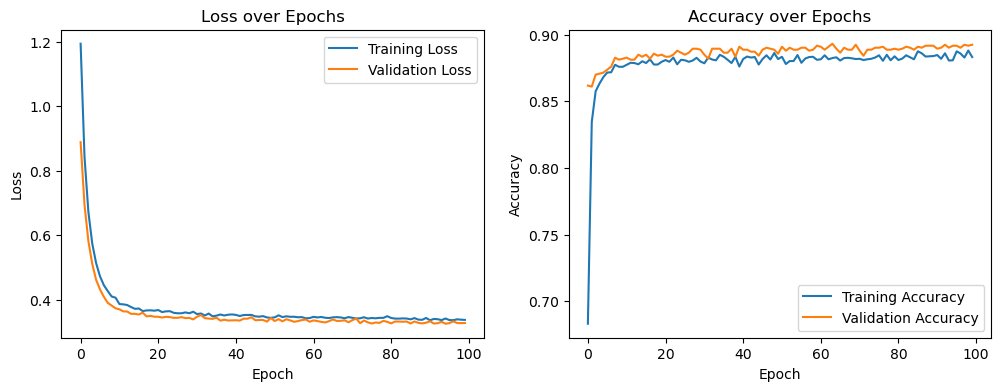

In [11]:
#plot 100 epoches
def plot_training_history(history, epochs):
    plt.figure(figsize=(12, 4))
    #plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'][:epochs], label='Training Loss')
    plt.plot(history.history['val_loss'][:epochs], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    #plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'][:epochs], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'][:epochs], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_training_history(history, epochs=100)

In [12]:
#evaluation
y_pred_classification = (classification_model.predict(X_test) > 0.5).astype("int32")

cm = confusion_matrix(y_test_classification, y_pred_classification)
accuracy = accuracy_score(y_test_classification, y_pred_classification)
precision = precision_score(y_test_classification, y_pred_classification)
recall = recall_score(y_test_classification, y_pred_classification)

table1 = pd.DataFrame(cm, columns=['Positive (Actual)', 'Negative (Actual)'], index=['Positive (Predicted)', 'Negative (Predicted)'])
table2 = pd.DataFrame({
    'Accuracy': [f"{accuracy:.2%}"],
    'Precision': [f"{precision:.2%}"],
    'Number of Samples': [len(y_test_classification)]
})


print("\nTable 1: Confusion matrix for the test data for the classification task.")
print(table1)
print("\nTable 2: Accuracy and precision for the test data for the classification task.")
print(table2)

53/53 [==============================] - 0s 277us/step

Table 1: Confusion matrix for the test data for the classification task.
                      Positive (Actual)  Negative (Actual)
Positive (Predicted)                884                 86
Negative (Predicted)                 91                611

Table 2: Accuracy and precision for the test data for the classification task.
  Accuracy Precision  Number of Samples
0   89.41%    87.66%               1672


Task2: Regression  NOx(GT)

In [13]:
#print correlation of NOx(GT)
print(correlation_matrix['NOx(GT)'])

CO(GT)           0.790964
PT08.S1(CO)      0.672575
NMHC(GT)         0.164364
C6H6(GT)         0.647815
PT08.S2(NMHC)    0.640296
NOx(GT)          1.000000
PT08.S3(NOx)    -0.636797
NO2(GT)          0.768603
PT08.S4(NO2)     0.202537
PT08.S5(O3)      0.737643
T               -0.246850
RH               0.204214
AH              -0.127589
Name: NOx(GT), dtype: float64


Based on the correlation matrix, the following features are highly correlated with NOx(GT):

	•	CO(GT): Correlation = 0.79
	•	NO2(GT): Correlation = 0.77
	•	PT08.S4(NO2): Correlation = 0.74
	•	PT08.S1(CO): Correlation = 0.67
	•	C6H6(GT): Correlation = 0.65


In [14]:
#feature selection about NOx(GT)
features2 = df_features[['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'NO2(GT)', 'PT08.S4(NO2)']]
target_regression = df_features['NOx(GT)']

In [15]:
scaler = StandardScaler()
features_regression_scaled = scaler.fit_transform(features2)

X_train_regression, X_test_regression, y_train_regression, y_test_regression = train_test_split(features_regression_scaled, target_regression, test_size=0.2, random_state=42)

Epoch 1/150
84/84 [==============================] - 0s 1ms/step - loss: 97357.2969 - mean_absolute_error: 237.8500 - val_loss: 91474.9375 - val_mean_absolute_error: 223.9291
Epoch 2/150
84/84 [==============================] - 0s 697us/step - loss: 62067.3320 - mean_absolute_error: 179.3837 - val_loss: 26283.2109 - val_mean_absolute_error: 116.5654
Epoch 3/150
84/84 [==============================] - 0s 689us/step - loss: 20467.3711 - mean_absolute_error: 102.9761 - val_loss: 14198.0898 - val_mean_absolute_error: 85.5522
Epoch 4/150
84/84 [==============================] - 0s 681us/step - loss: 15480.1631 - mean_absolute_error: 87.8672 - val_loss: 11848.0342 - val_mean_absolute_error: 76.6960
Epoch 5/150
84/84 [==============================] - 0s 678us/step - loss: 13488.5449 - mean_absolute_error: 81.7153 - val_loss: 10531.3965 - val_mean_absolute_error: 72.0643
Epoch 6/150
84/84 [==============================] - 0s 676us/step - loss: 13878.4385 - mean_absolute_error: 80.0498 - val

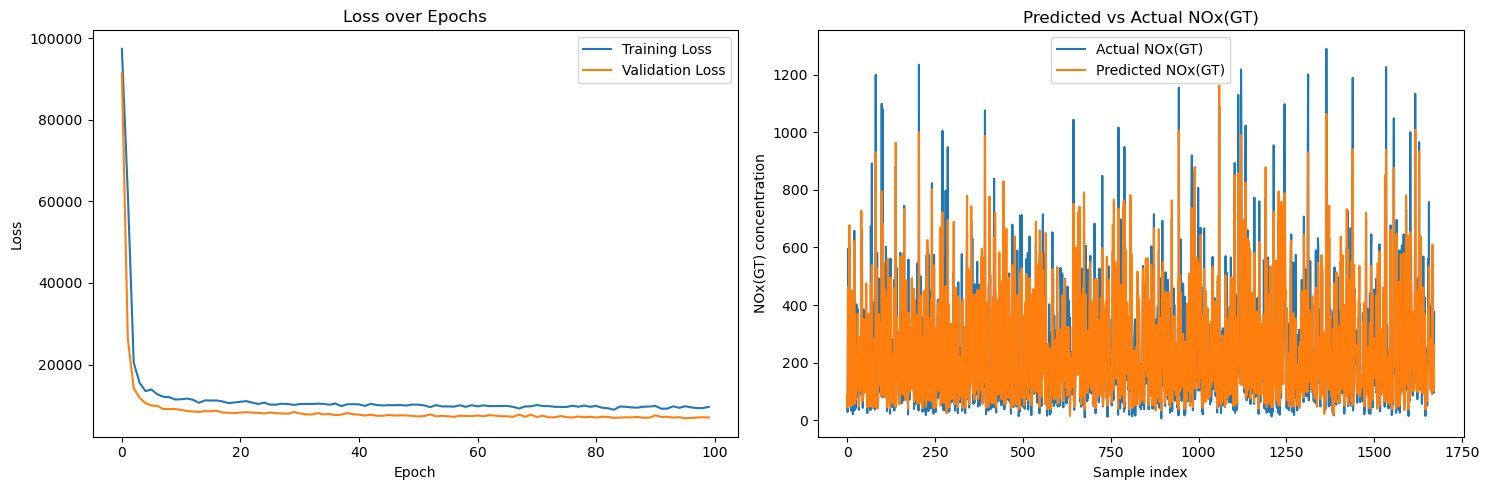


Table 3: Performance metrics for the regression task.
    RMSE    MAE  Number of Samples
0  85.63  56.20               1672


In [16]:
# design network
def create_regression_model(input_shape):
    model = Sequential()
    model.add(Dense(128, input_dim=input_shape, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(1)) 
    return model

input_shape = X_train_regression.shape[1]

#build
regression_model = create_regression_model(input_shape)

#compile
regression_model.compile(optimizer=Adam(learning_rate=0.0005),loss='mean_squared_error',metrics=['mean_absolute_error'])

#train
history = regression_model.fit(X_train_regression, y_train_regression,epochs=150,batch_size=64,validation_split=0.2)

#save
regression_model.save('regression_model.h5')

# plot
def plot_training_and_prediction(history, y_test, y_pred, epochs):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].plot(history.history['loss'][:epochs], label='Training Loss')
    axs[0].plot(history.history['val_loss'][:epochs], label='Validation Loss')
    axs[0].set_title('Loss over Epochs')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Loss')
    axs[0].legend()
    
    axs[1].plot(y_test.values, label='Actual NOx(GT)')
    axs[1].plot(y_pred, label='Predicted NOx(GT)')
    axs[1].set_title('Predicted vs Actual NOx(GT)')
    axs[1].set_xlabel('Sample index')
    axs[1].set_ylabel('NOx(GT) concentration')
    axs[1].legend()
    plt.tight_layout()
    plt.show()

y_pred_regression = regression_model.predict(X_test_regression)
plot_training_and_prediction(history, y_test_regression, y_pred_regression, epochs=100)

#caculate the meansure
rmse = np.sqrt(mean_squared_error(y_test_regression, y_pred_regression))
mae = mean_absolute_error(y_test_regression, y_pred_regression)

#build table
table3 = pd.DataFrame({
    'RMSE': [f"{rmse:.2f}"],
    'MAE': [f"{mae:.2f}"],
    'Number of Samples': [len(y_test_regression)]
})

#build table
print("\nTable 3: Performance metrics for the regression task.")
print(table3)



Here is the code to test the model on the new dataset

In [2]:
# Load the saved classification model
classification_model = tf.keras.models.load_model('classification_model.h5')
# Load the saved regression model
regression_model = tf.keras.models.load_model('regression_model.h5')

# Load new data
new_data = pd.read_excel('Generalization Dataset.xlsx')

# Preprocess data
new_data = new_data.replace(-200, np.nan)
new_data = new_data.drop(columns=['Date', 'Time'])
new_data.interpolate(method='linear', inplace=True)

# Feature selection and standardization for classification
features_classification = ['PT08.S1(CO)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)', 'PT08.S5(O3)']
X_new_test_classification = new_data[features_classification]
y_new_test_classification = new_data['CO(GT)'] > new_data['CO(GT)'].mean()

scaler_classification = StandardScaler()
X_new_test_classification_scaled = scaler_classification.fit_transform(X_new_test_classification)

# Predict with new data for classification
y_new_pred_classification = (classification_model.predict(X_new_test_classification_scaled) > 0.5).astype("int32")

# Calculate classification performance metrics
cm_new = confusion_matrix(y_new_test_classification, y_new_pred_classification)
accuracy_new = accuracy_score(y_new_test_classification, y_new_pred_classification)
precision_new = precision_score(y_new_test_classification, y_new_pred_classification)

# Create tables for classification results
table1 = pd.DataFrame(cm_new, columns=['Positive (Actual)', 'Negative (Actual)'], index=['Positive (Predicted)', 'Negative (Predicted)'])
table2 = pd.DataFrame({
    'Accuracy': [f"{accuracy_new:.2%}"],
    'Precision': [f"{precision_new:.2%}"],
    'Number of Samples': [len(y_new_test_classification)]
})

print("\nTable 1: Confusion matrix for the test data for the classification task.")
print(table1)
print("\nTable 2: Accuracy and precision for the test data for the classification task.")
print(table2)

# Feature selection and standardization for regression
features_regression = ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'NO2(GT)', 'PT08.S4(NO2)']
X_new_test_regression = new_data[features_regression]
y_new_test_regression = new_data['NOx(GT)']

scaler_regression = StandardScaler()
X_new_test_regression_scaled = scaler_regression.fit_transform(X_new_test_regression)

# Predict with new data for regression
y_new_pred_regression = regression_model.predict(X_new_test_regression_scaled)

# Calculate regression performance metrics
rmse_new = np.sqrt(mean_squared_error(y_new_test_regression, y_new_pred_regression))
mae_new = mean_absolute_error(y_new_test_regression, y_new_pred_regression)

# Create tables for regression results
table3 = pd.DataFrame({
    'RMSE': [f"{rmse_new:.2f}"],
    'MAE': [f"{mae_new:.2f}"],
    'Number of Samples': [len(y_new_test_regression)]
})

print("\nTable 3: Result table for the test data for the regression task.")
print(table3)

28/28 [==============================] - 0s 261us/step

Table 1: Confusion matrix for the test data for the classification task.
                      Positive (Actual)  Negative (Actual)
Positive (Predicted)                503                 27
Negative (Predicted)                 30                312

Table 2: Accuracy and precision for the test data for the classification task.
  Accuracy Precision  Number of Samples
0   93.46%    92.04%                872
28/28 [==============================] - 0s 639us/step

Table 3: Result table for the test data for the regression task.
     RMSE    MAE  Number of Samples
0  102.51  66.60                872


2024-07-02 15:54:35.890101: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
